In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

IMG_SIZE = 224  
MODEL_PATH = "final_model.h5"  
TEST_PATH = "DataTest"  

model = load_model(MODEL_PATH)


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Khởi tạo ImageDataGenerator cho bộ dữ liệu test
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Đọc dữ liệu từ thư mục 'DataTest', đảm bảo rằng các thư mục con là 'good' và 'error'
test_generator = test_datagen.flow_from_directory(
    'DataTest',  # Đường dẫn đến thư mục DataTest
    target_size=(224, 224),  # Kích thước của ảnh sau khi resize
    batch_size=32,  # Kích thước batch
    class_mode='binary',  # 'binary' cho phân loại 2 lớp (good, error)
    shuffle=False  # Không xáo trộn để có thể kiểm tra độ chính xác chính xác
)

Found 20 images belonging to 2 classes.


In [5]:
# Đánh giá mô hình trên bộ dữ liệu test
test_loss, test_accuracy = model.evaluate(test_generator)

# In kết quả đánh giá
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

1/1 [==============================] - 1s 927ms/step - loss: 0.2305 - accuracy: 0.9000
Test Loss: 0.23051023483276367
Test Accuracy: 0.8999999761581421


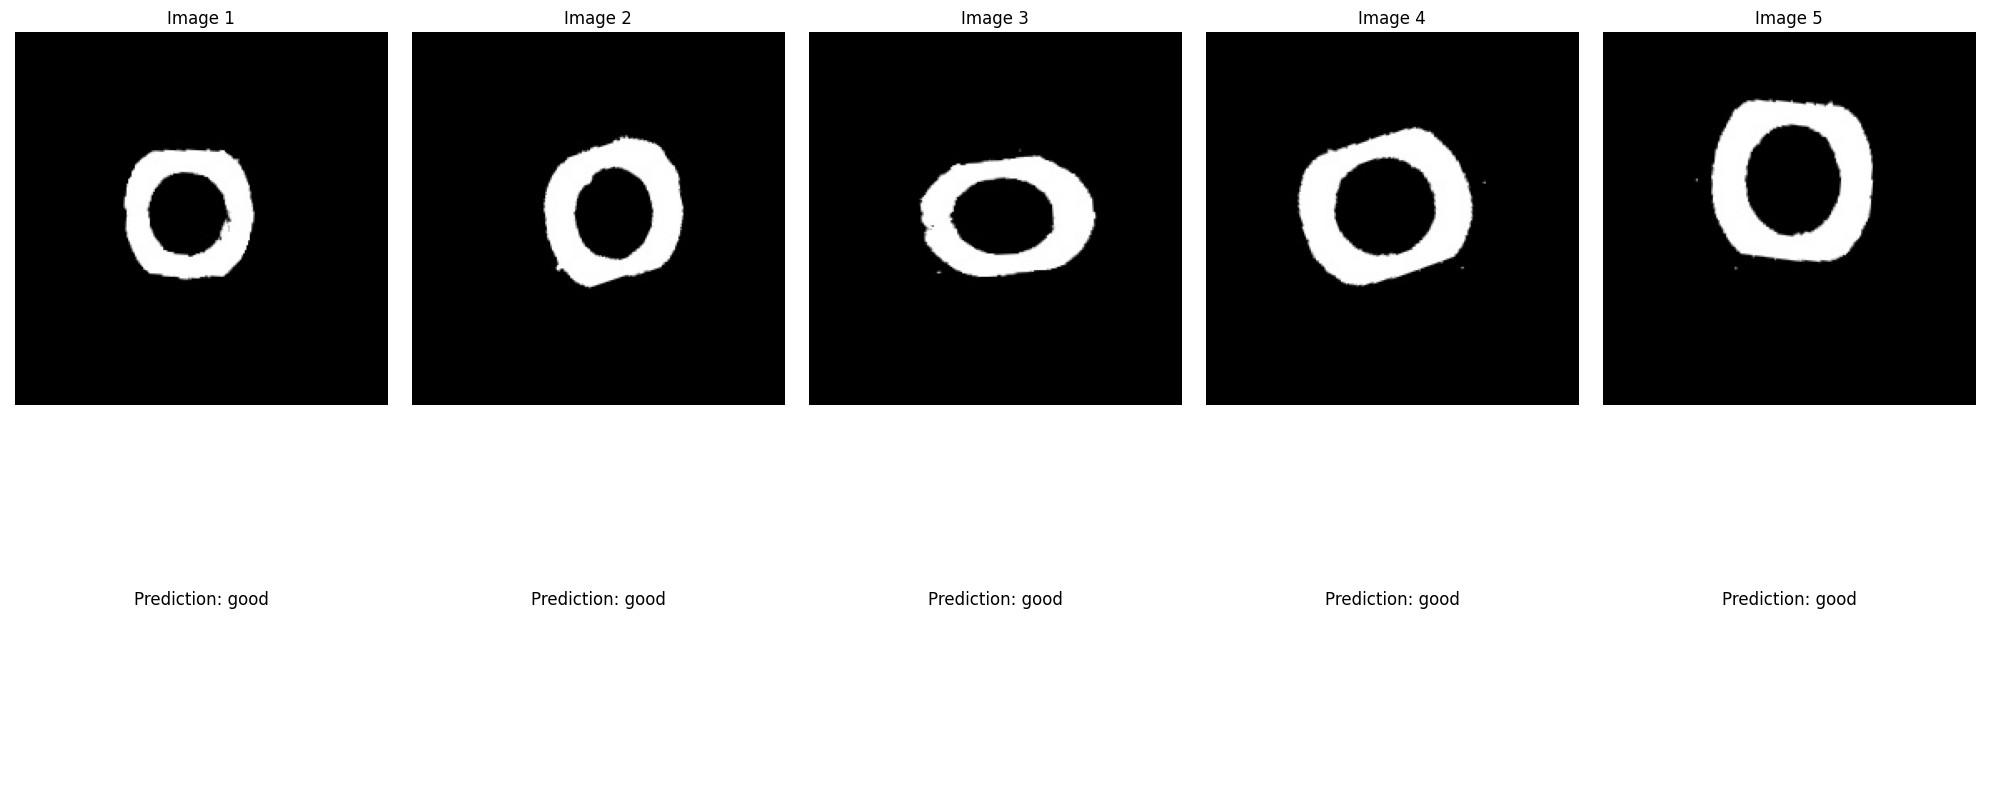

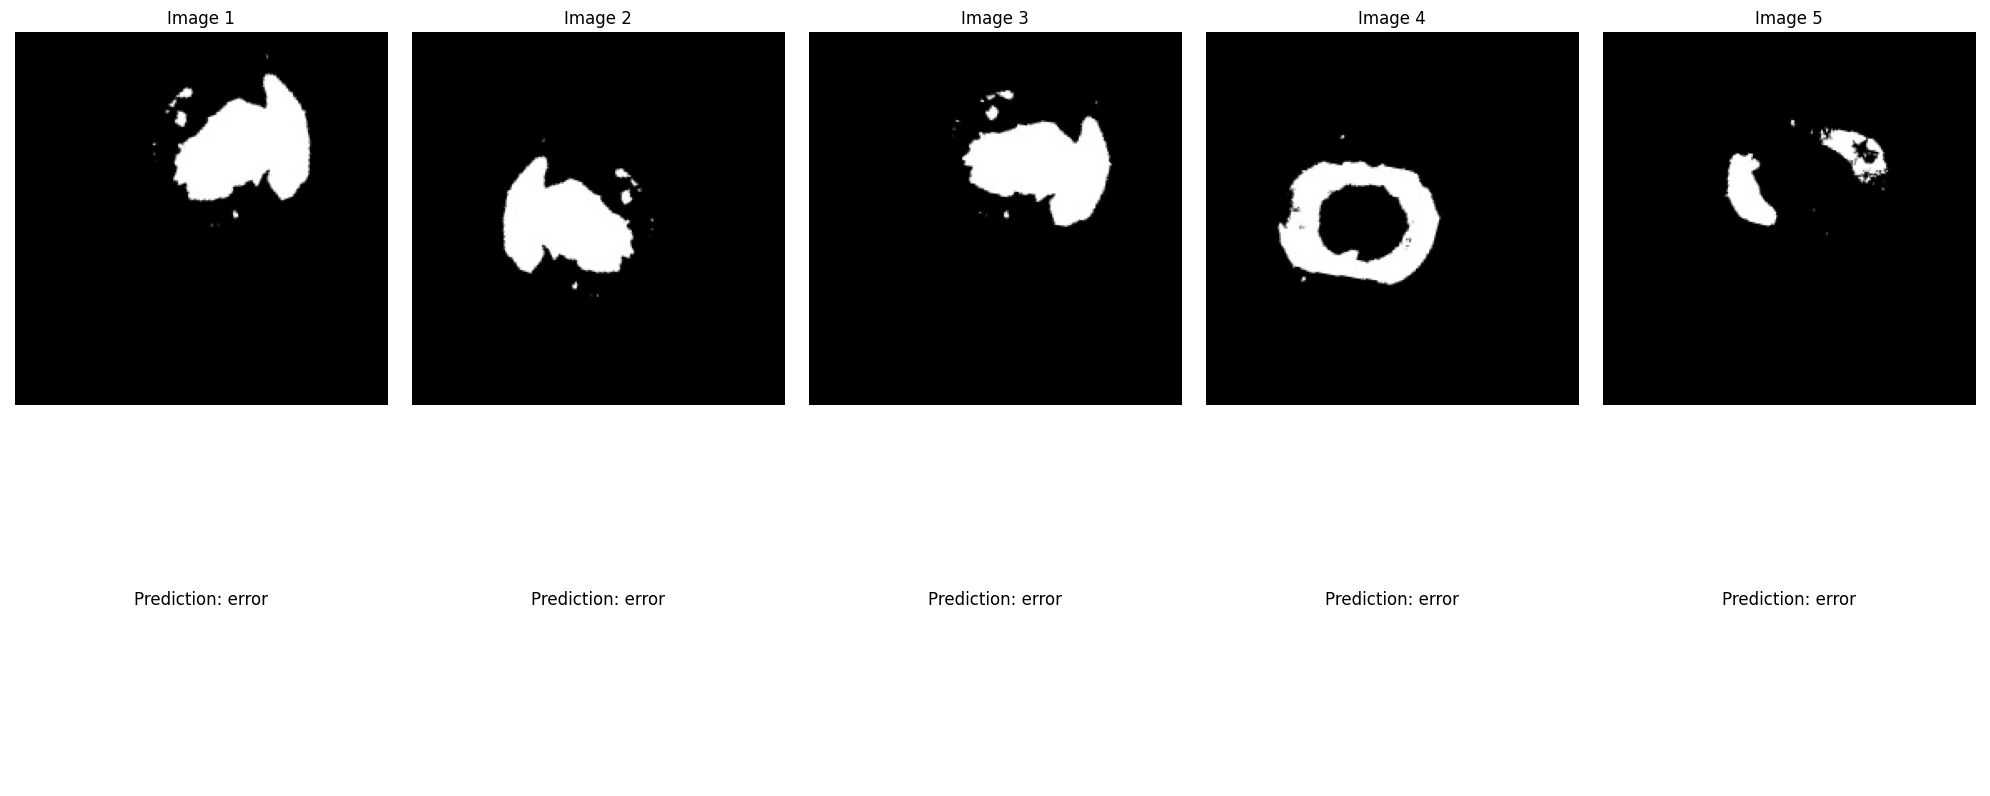

In [8]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Tải mô hình đã huấn luyện
final_model = load_model('final_model.h5')

# Hàm lấy 10 ảnh từ thư mục và thực hiện dự đoán
def load_and_predict_images(class_name, num_images=5):
    # Đường dẫn tới thư mục 'good' hoặc 'error'
    folder_path = os.path.join('DataTest', class_name)
    
    # Lấy tất cả các tệp hình ảnh trong thư mục
    image_paths = glob.glob(os.path.join(folder_path, '*'))[:num_images]
    
    images = []
    for img_path in image_paths:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize ảnh về kích thước mong muốn
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển đổi BGR -> RGB
        img = img / 255.0  # Chuẩn hóa ảnh
        images.append(img)
    
    images = np.array(images)
    
    # Dự đoán
    predictions = final_model.predict(images)

    # In kết quả dự đoán
    fig, axes = plt.subplots(2, num_images, figsize=(20, 8))
    for i in range(num_images):
        ax = axes[0, i]
        ax.imshow(images[i])
        ax.axis('off')
        ax.set_title(f"Image {i+1}")
        
        ax = axes[1, i]
        predicted_class = 'good' if predictions[i] > 0.5 else 'error'
        ax.text(0.5, 0.5, f"Prediction: {predicted_class}", fontsize=12, ha='center', va='center')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Lấy 10 ảnh từ thư mục 'good' và 'error' và dự đoán
load_and_predict_images('good')
load_and_predict_images('error')
